<a href="https://colab.research.google.com/github/MJSinMJ/SDATP/blob/main/sda_project_jinseo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns

train= pd.read_csv('/content/drive/MyDrive/dacon/전력예측_sda/train.csv')
building_info = pd.read_csv('/content/drive/MyDrive/dacon/전력예측_sda/building_info.csv')


In [30]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


# Feature engineering

In [31]:
train= train.rename(columns={
    '건물번호': 'building_id',
    '일시': 'date_time',
    '기온(C)': 'temp',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption',
})
train.drop('num_date_time', axis=1, inplace=True)
train.head()


,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [32]:
building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()


,building_id,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [33]:
train= pd.merge(train, building_info, on='building_id', how='left')


In [34]:
train['date_time'] = pd.to_datetime(train['date_time'], format='%Y%m%d %H')
train['hour'] = train['date_time'].dt.hour
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['year'] = train['date_time'].dt.year
train.head()
#월,주,시간,날로 변경

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-,4,1,6,2022


In [35]:
#결측치
train.isna().sum()
#rainfall, sunshine, solar_radiation가 결측치 다수

building_id               0
date_time                 0
temp                      0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type             0
total_area                0
cooling_area              0
solar_power_cap           0
ess_cap                   0
pcs_cap                   0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [36]:
#강수량의 결측치는 주로 비가 오지 않은 시간을 의미할 수 있으므로 0으로
train['rainfall'] = train['rainfall'].fillna(0)
train

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.00,39570.00,-,-,-,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.00,39570.00,-,-,-,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.00,39570.00,-,-,-,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.00,39570.00,-,-,-,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.00,39570.00,-,-,-,4,1,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,NaN,881.04,Hotel and Resort,57497.84,40035.23,-,-,-,19,24,8,2022
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,NaN,798.96,Hotel and Resort,57497.84,40035.23,-,-,-,20,24,8,2022
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,NaN,NaN,825.12,Hotel and Resort,57497.84,40035.23,-,-,-,21,24,8,2022
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,NaN,NaN,640.08,Hotel and Resort,57497.84,40035.23,-,-,-,22,24,8,2022


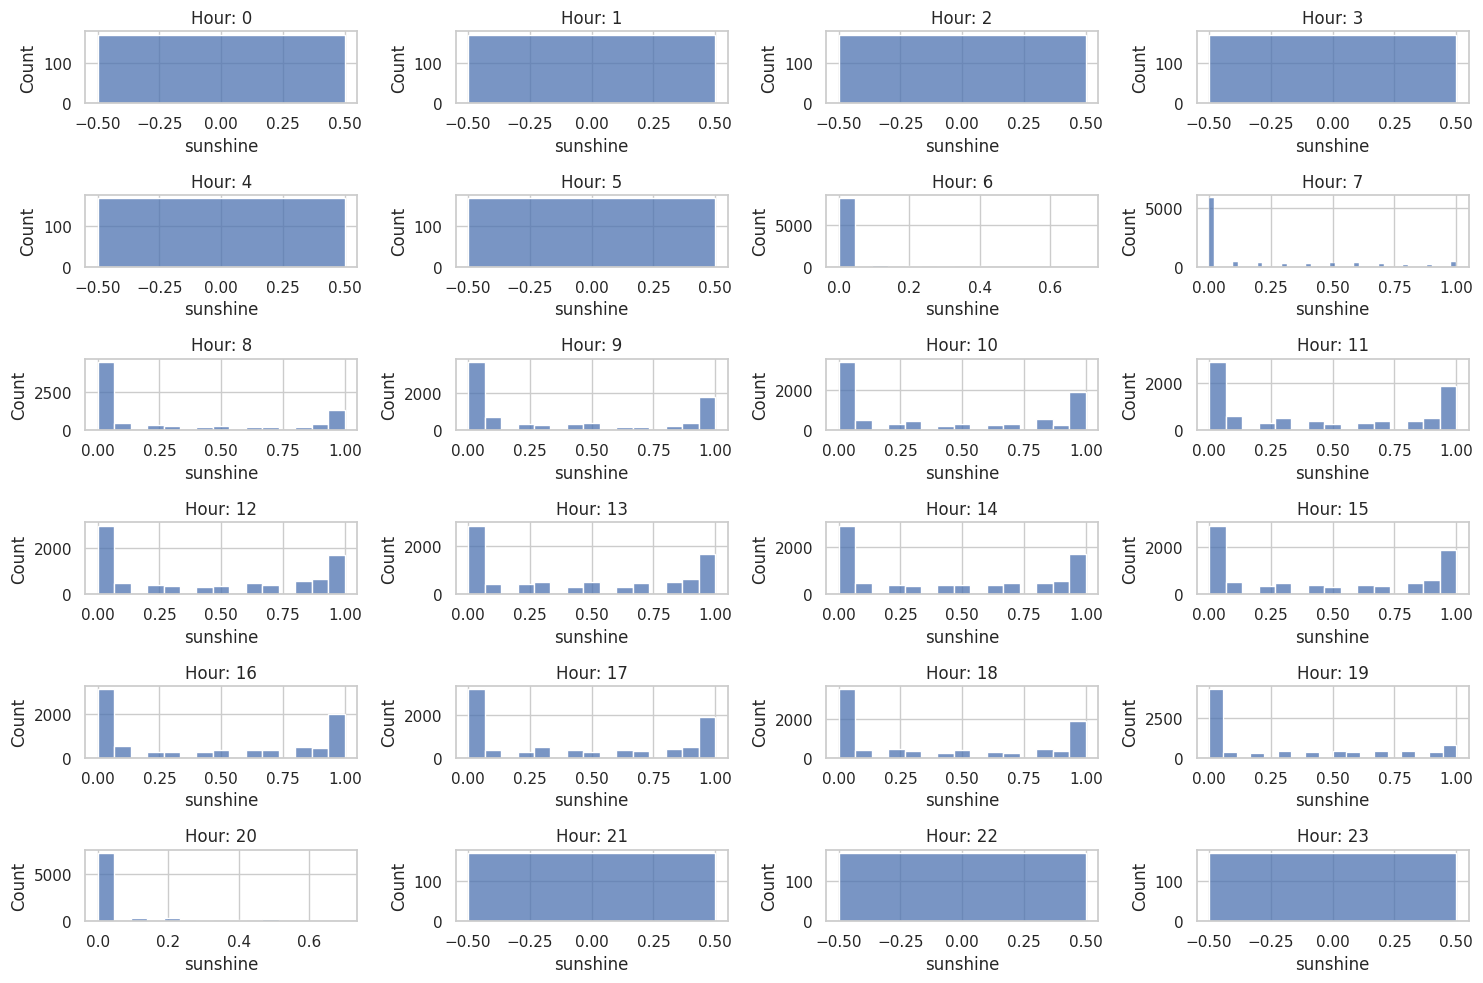

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(24):
    sns.histplot(train[train.hour == i]['sunshine'], ax=axs[i])
    axs[i].set_title(f'Hour: {i}')

plt.tight_layout()
#일조량은 날씨, 시간등에 따라 변동이 심하다... 결측치를 어떻게 채우지?

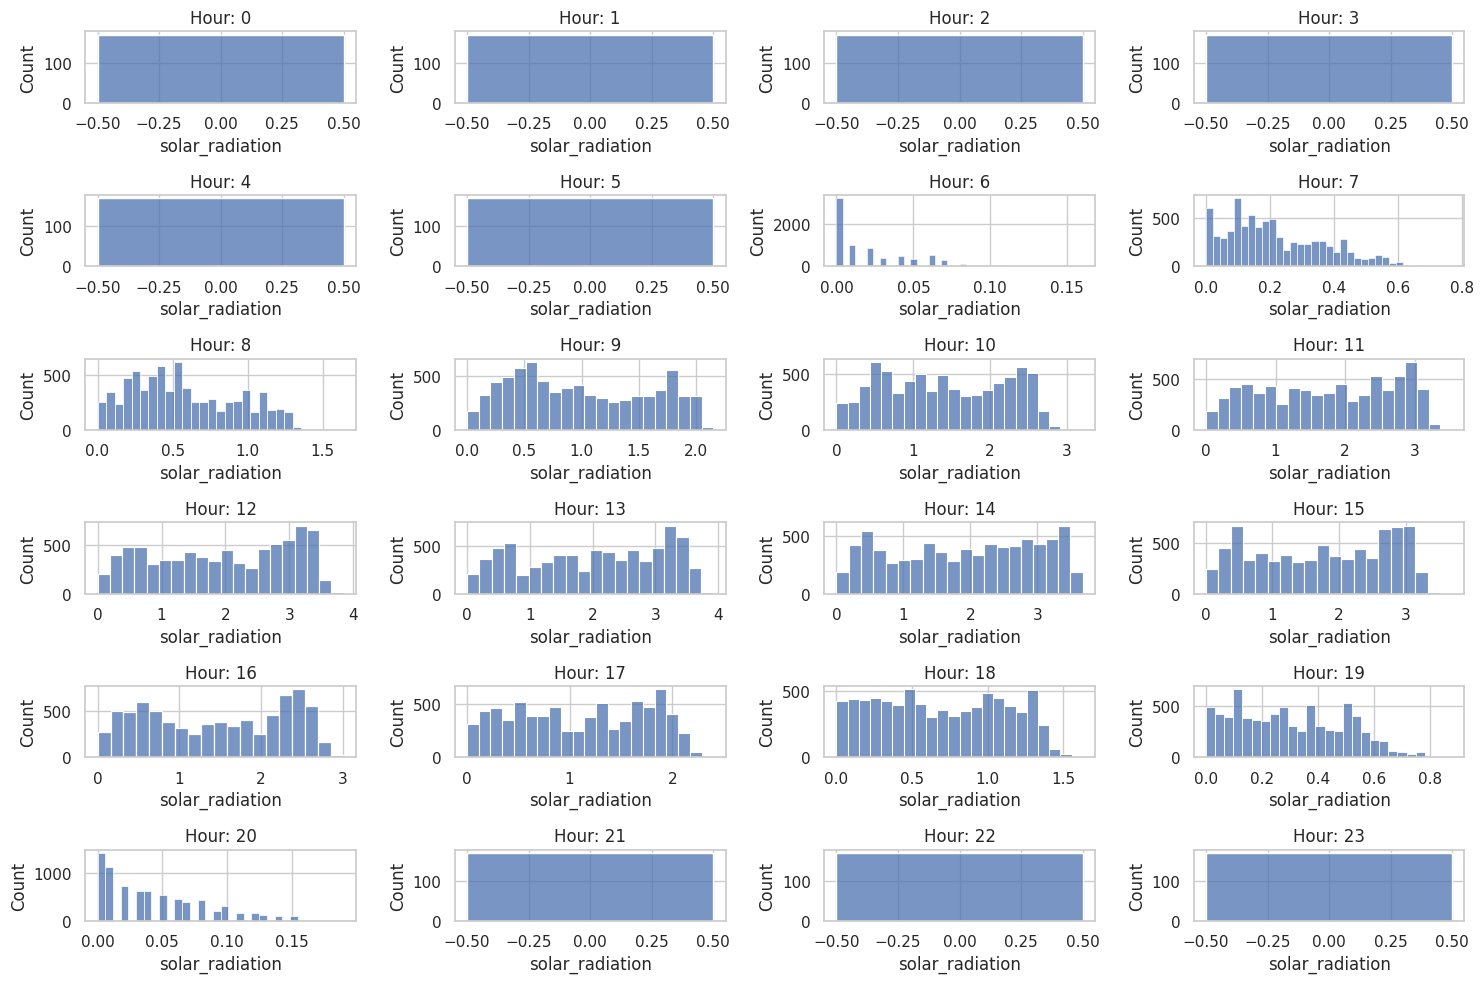

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(24):
    sns.histplot(train[train.hour == i]['solar_radiation'], ax=axs[i])
    axs[i].set_title(f'Hour: {i}')

plt.tight_layout()
#이것도 똑같음

In [39]:
train=train.drop(['sunshine','solar_radiation'],axis=1)
#일단 drop함

In [40]:
print(len(train[train['solar_power_cap'] == '-']))
print(len(train[train['ess_cap'] == '-']))
print(len(train[train['pcs_cap'] == '-']))
#없애줘야함

130560
193800
193800


In [41]:
train = train.drop(['solar_power_cap', 'ess_cap', 'pcs_cap'], axis=1)

In [42]:
train.isna().sum()

building_id           0
date_time             0
temp                  0
rainfall              0
windspeed            19
humidity              9
power_consumption     0
building_type         0
total_area            0
cooling_area          0
hour                  0
day                   0
month                 0
year                  0
dtype: int64

<Axes: xlabel='windspeed', ylabel='Count'>

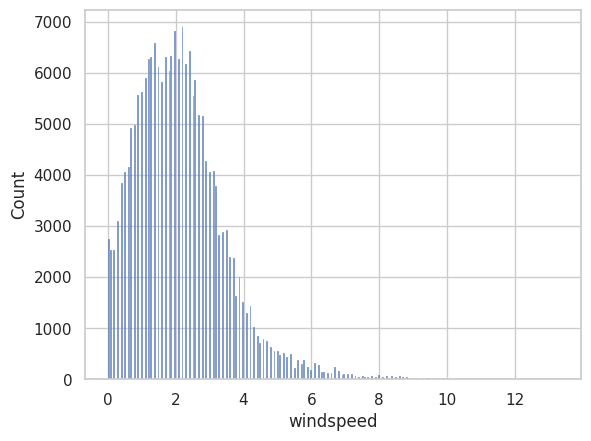

In [43]:
sns.histplot(train['windspeed'])

<Axes: xlabel='humidity', ylabel='Count'>

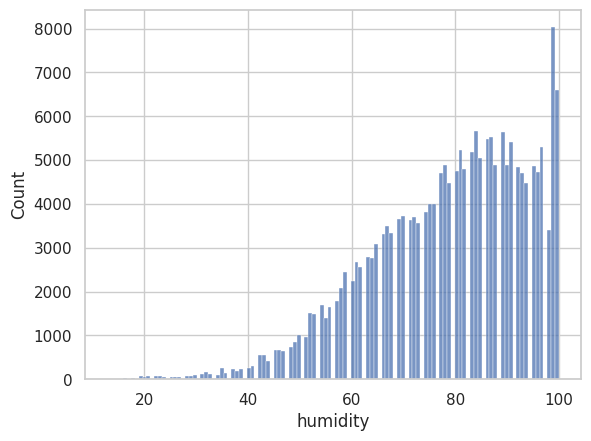

In [44]:
sns.histplot(train['humidity'])


In [45]:
#근처값으로 fillna한다... 평균으로 하기엔 편차가 큼
train['windspeed'].fillna(method='ffill', inplace=True)
train['humidity'].fillna(method='ffill', inplace=True)


In [46]:
train
#최종 분석할 data feature engineering

,building_id,date_time,temp,rainfall,windspeed,humidity,power_consumption,building_type,total_area,cooling_area,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,Other Buildings,110634.00,39570.00,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,Other Buildings,110634.00,39570.00,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,Other Buildings,110634.00,39570.00,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,Other Buildings,110634.00,39570.00,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,Other Buildings,110634.00,39570.00,4,1,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,Hotel and Resort,57497.84,40035.23,19,24,8,2022
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,Hotel and Resort,57497.84,40035.23,20,24,8,2022
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,Hotel and Resort,57497.84,40035.23,21,24,8,2022
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,Hotel and Resort,57497.84,40035.23,22,24,8,2022


In [47]:
train.isna().sum()
#결측치 0

building_id          0
date_time            0
temp                 0
rainfall             0
windspeed            0
humidity             0
power_consumption    0
building_type        0
total_area           0
cooling_area         0
hour                 0
day                  0
month                0
year                 0
dtype: int64

## EDA

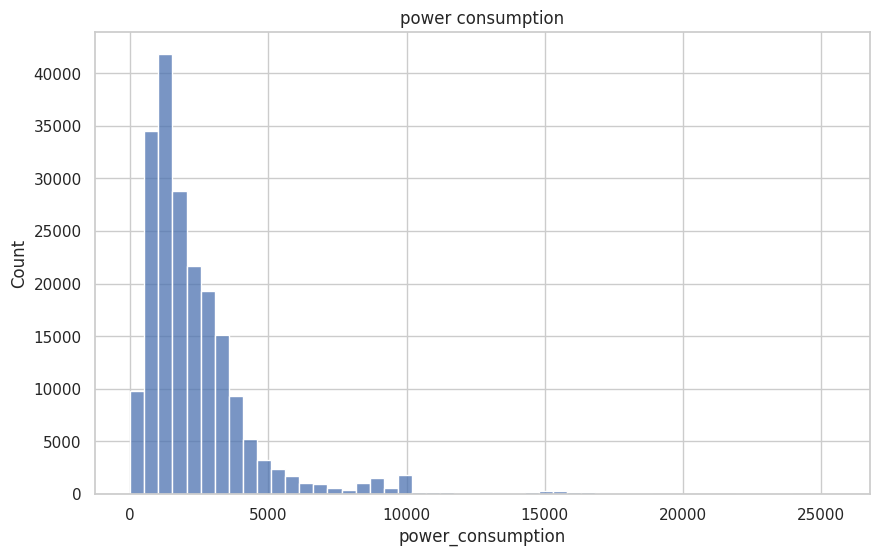

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(train['power_consumption'],bins=50)
plt.title("power consumption")
plt.show()

In [49]:
#hour,day,month,year별 전력 소비량 분석
train['day_of_year'] = train['date_time'].dt.dayofyear
mean_power_by_day_of_year = train.groupby('day_of_year')['power_consumption'].mean()
train['hour_of_year'] = train['hour'] + (train['day_of_year'] - 1) * 24
mean_power_by_hour_of_year = train.groupby('hour_of_year')['power_consumption'].mean()
# 년기준 월평균 소비전력
mean_power_by_month = train.groupby('month')['power_consumption'].mean()
# 일기준 시간 평균 소비전력
mean_power_by_hour = train.groupby('hour')['power_consumption'].mean()
mean_power_by_day = train.groupby('day')['power_consumption'].mean()



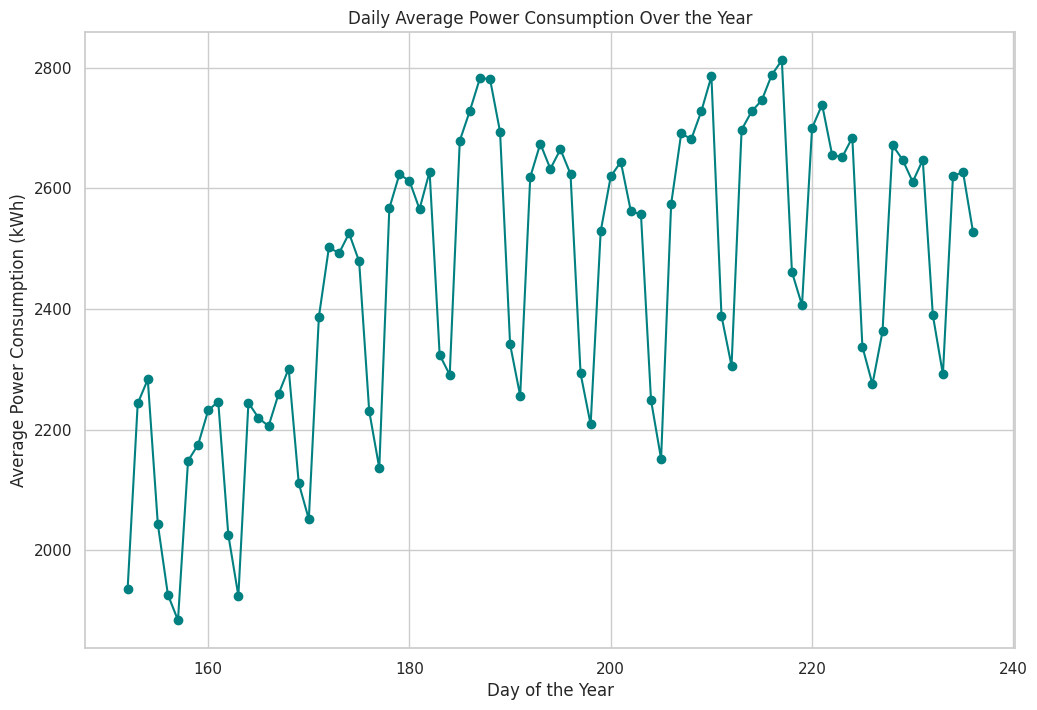

In [50]:
# day of the year에 대한 일 평균 소비전력 그래프
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year.index, mean_power_by_day_of_year.values, color='teal', marker='o', linestyle='-')
plt.title('Daily Average Power Consumption Over the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Power Consumption (kWh)')
plt.grid(True)  # 그리드 추가
plt.show()



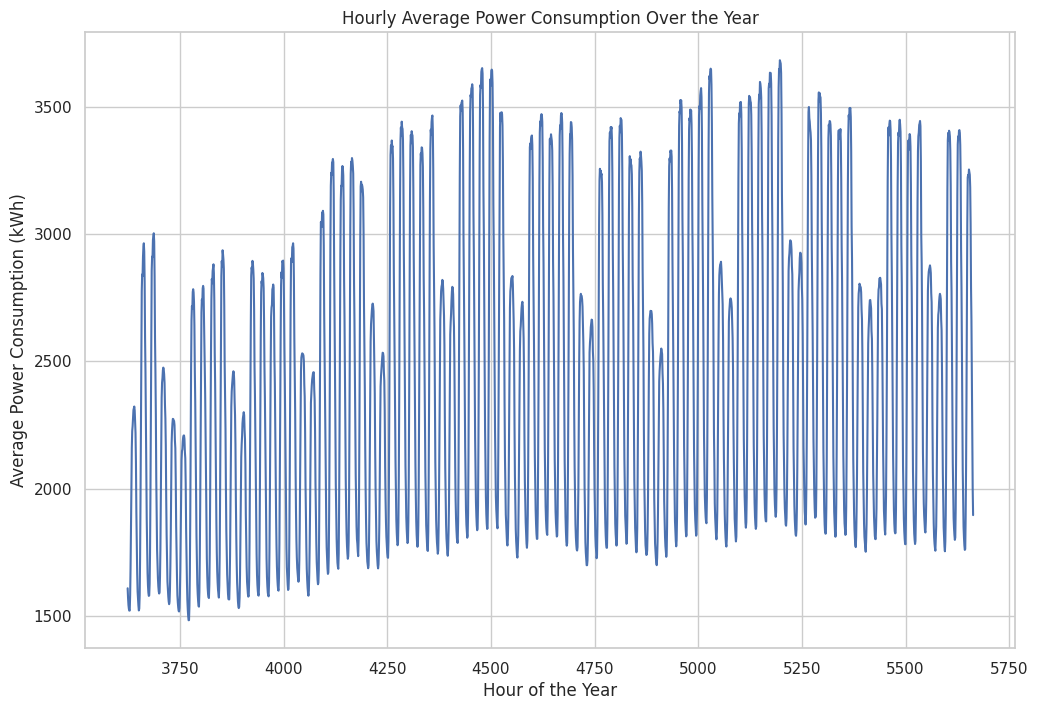

In [51]:
# 년기준 시간평균 소비전력 그래프
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Hourly Average Power Consumption Over the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Average Power Consumption (kWh)')
plt.show()


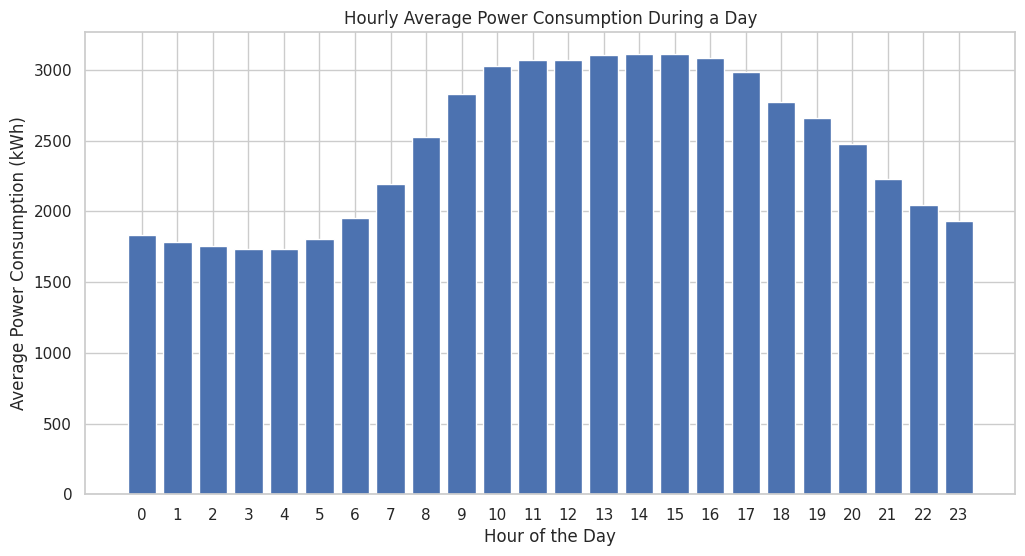

In [52]:
# 하루중 시간 평균 소비전력 그래프
plt.figure(figsize=(12, 6))
plt.bar(mean_power_by_hour.index, mean_power_by_hour.values)
plt.title('Hourly Average Power Consumption During a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption (kWh)')
plt.xticks(range(0, 24))  # 시간은 0부터 23까지
plt.show()
# 퇴근하고 난 새벽 시간대는 확실히 전력 소비량이 적음

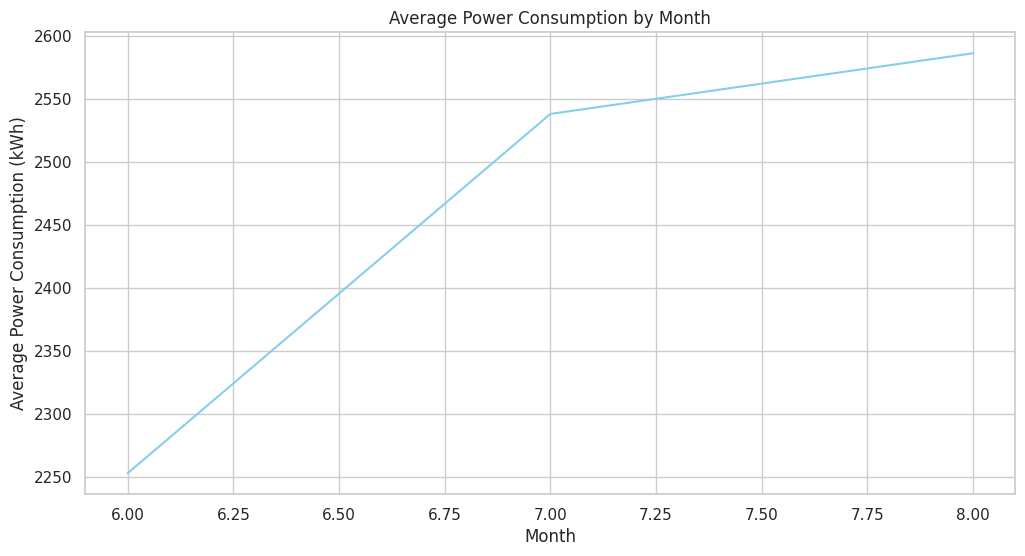

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(mean_power_by_month.index, mean_power_by_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (kWh)')
plt.title('Average Power Consumption by Month')
plt.show()
#여름철이 될수록 전력소비량이 늘어남.

#Hypothesis testing

In [54]:
#상관분석으로 각 기후 변수와 전력 consumption의 상관관계
#Null Hypothesis (H0): 기후 변수와 전력 생산량 사이에는 상관관계가 없다.
#Alternative Hypothesis (H1): 기후 변수와 전력 생산량 사이에는 상관관계가 있다.
#pearsonr or spearsmanr?
#correlation값만 확인하면 잘못된 결론 낼 수 있으므로 항상 plot확인하여 data에 cluster/ outlier / nonlinearity먼저확인

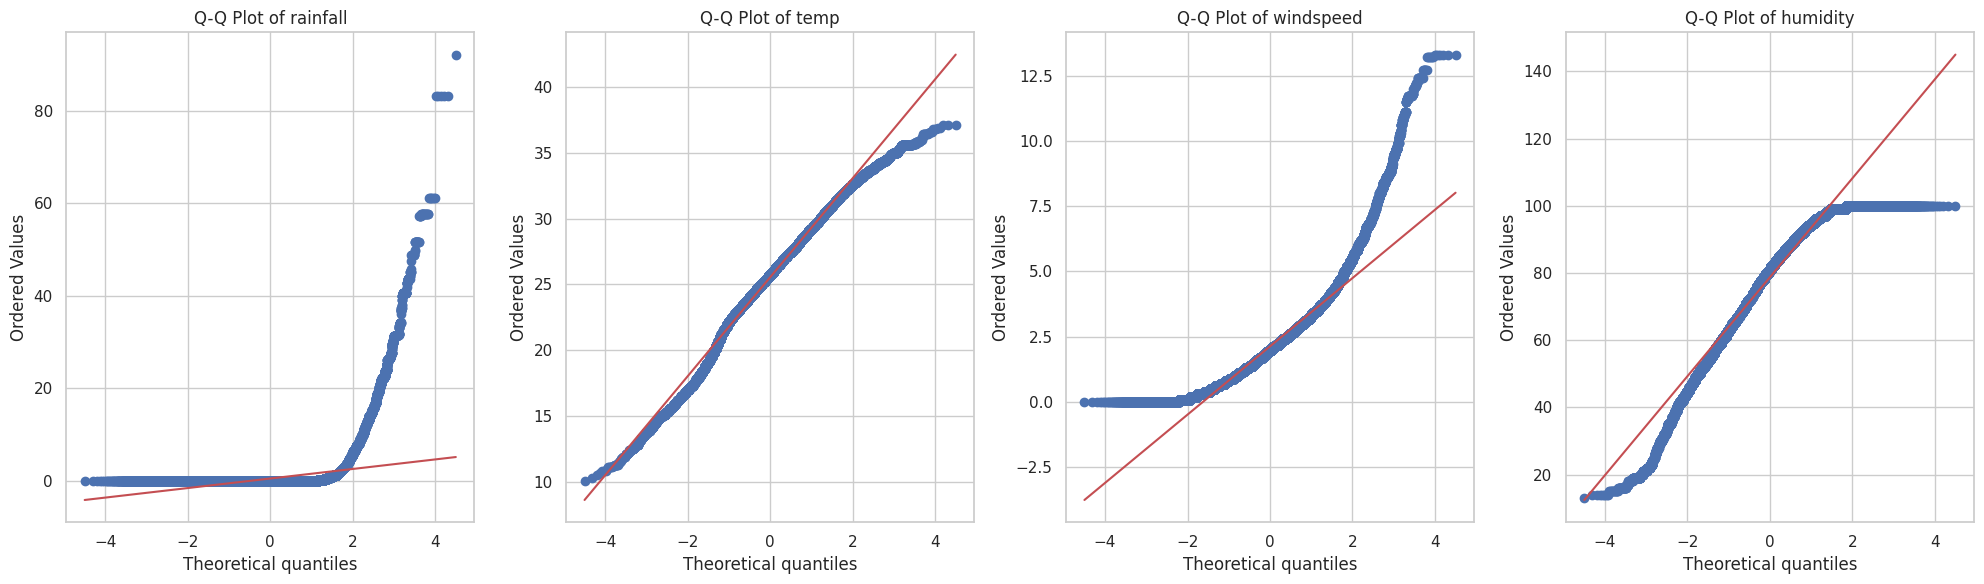

In [55]:
#정규성
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq(dataframe, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(5 * len(columns), 6))

    for i, col in enumerate(columns):
        stats.probplot(dataframe[col], dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

plot_qq(train, ['rainfall', 'temp', 'windspeed', 'humidity'])
#정규성을 따르지 않음

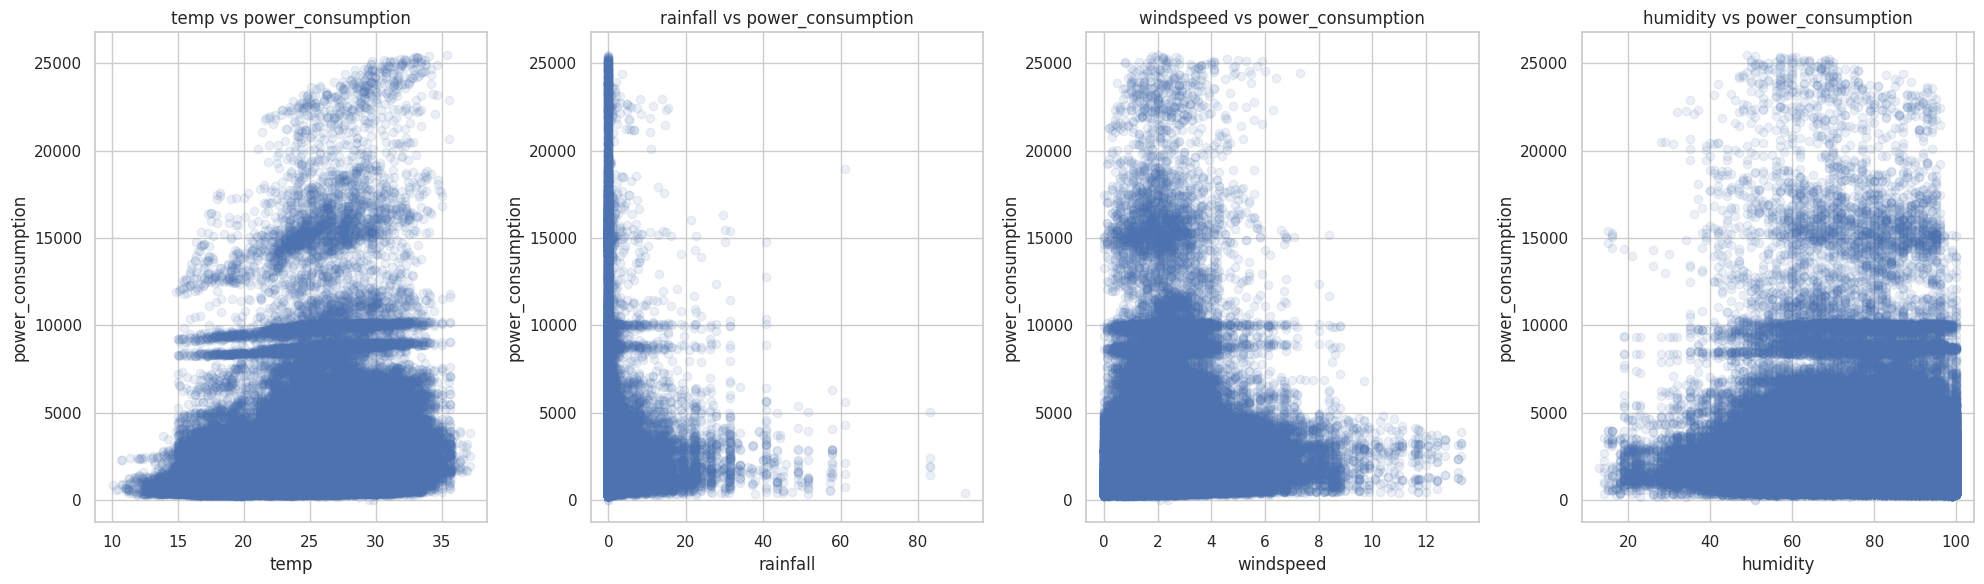

In [70]:
#비선형성 확인
#다 nonlinear함
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(dataframe, independent_vars, dependent_var, alpha_value=0.1):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        axs[i].scatter(dataframe[ivar], dataframe[dependent_var], alpha=alpha_value)
        axs[i].set_xlabel(ivar)
        axs[i].set_ylabel(dependent_var)
        axs[i].set_title(f'{ivar} vs {dependent_var}')

    plt.tight_layout()
    plt.show()
plot_scatter(train, ['temp', 'rainfall', 'windspeed', 'humidity'], 'power_consumption', alpha_value=0.1)


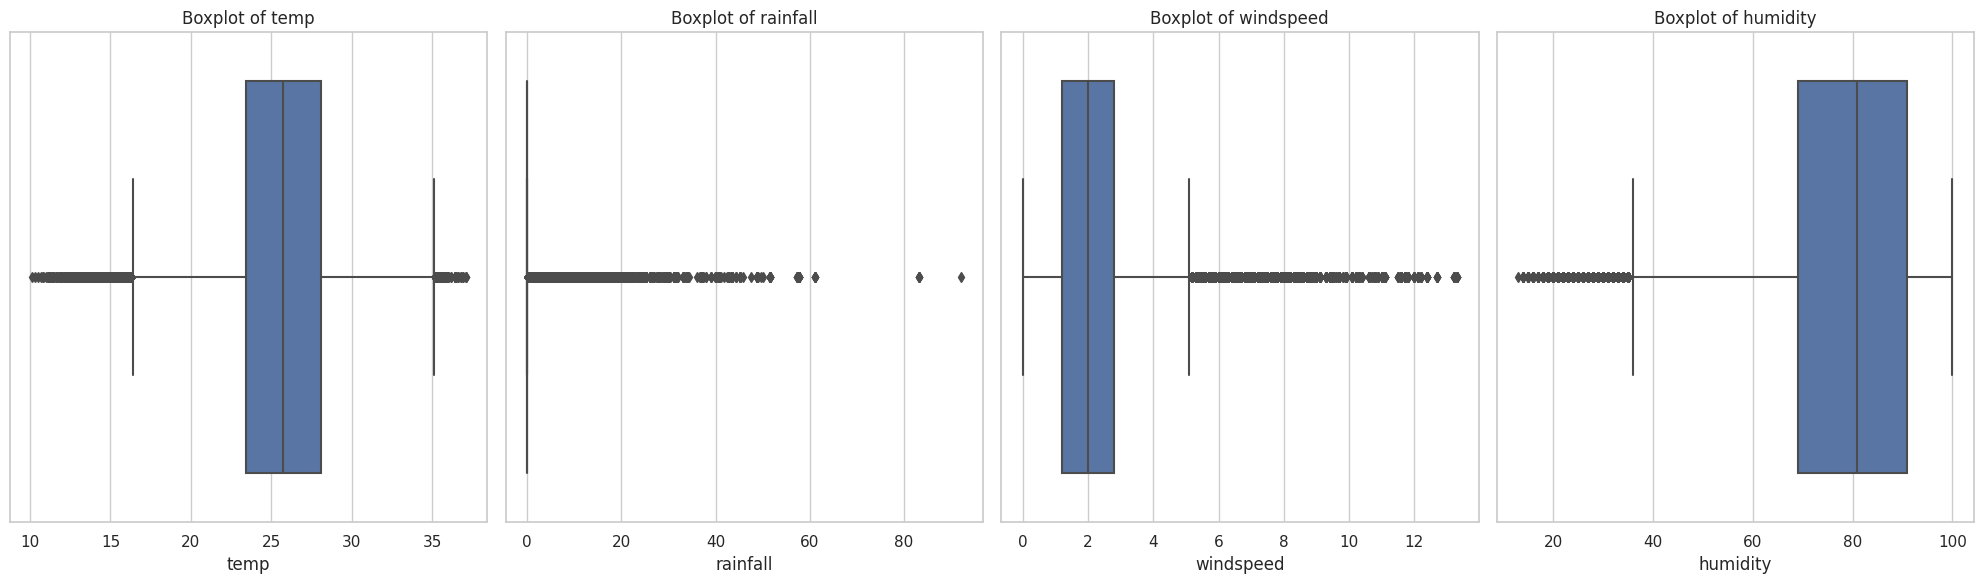

In [68]:
#이상치 확인
def plot_sampled_boxplots(dataframe, independent_vars, dependent_var, sample_size=1000):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        sns.boxplot(x=dataframe[ivar], ax=axs[i])
        axs[i].set_title(f'Boxplot of {ivar}')

    plt.tight_layout()
    plt.show()
plot_sampled_boxplots(train, ['temp', 'rainfall', 'windspeed', 'humidity'], 'power_consumption')

In [58]:
#비정규, outlier 상당수 존재, 비선형이므로 data의 rank를 이용하여 상관관계 계산
#non-parametric correlation.
from scipy import stats
climate_variables = train[['temp', 'rainfall', 'windspeed', 'humidity']]
power_consumption = train['power_consumption']

for variable in climate_variables.columns:
    correlation, p_value = stats.spearmanr(climate_variables[variable], power_consumption)
    print(f'{variable}와 전력 소비량의 상관계수: {correlation}, p-value: {p_value}')


temp와 전력 소비량의 상관계수: 0.2752228203556909, p-value: 0.0
rainfall와 전력 소비량의 상관계수: 0.007643479540694646, p-value: 0.0005558073355092633
windspeed와 전력 소비량의 상관계수: 0.21991073019927107, p-value: 0.0
humidity와 전력 소비량의 상관계수: -0.21026587079778553, p-value: 0.0


결과해석
4개의 기후 변수 다 H0 기각. 모두 p-value가 0.05보다 낮다.
따라서 기후 변수와 전력 생산량 사이에는 통계적으로 유의한 상관관계가 있다고 볼 수 있고 우리는 각 기후 변수와 전력 생산량 사이에 상관관계가 있다는 대립 가설을 받아들일수 있다.

